# Preprocessing Data

## Import Library

In [47]:
import pandas as pd
import re
import nltk
import tqdm
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords as stopwords_scratch
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import ast
from res.change_word import replace_word

In [48]:
# nltk.download('punkt_tab') # Handle ERROR
# nltk.download('stopwords') # Handle ERROR

## Load Data

In [49]:
comment_df = pd.read_csv('./data/youtube-comment.csv')

## Cleaning Data

### Regex Function

In [50]:
def clean_comment(comment):
    # Memeriksa jika nilai adalah NaN
    if pd.isna(comment):
        return ' '
    # Mengonversi nilai menjadi string
    comment = str(comment)
    # Mengganti karakter newline dengan spasi
    comment = re.sub(r'\n+', ' ', comment)
    # Menghapus URL
    comment = re.sub(r'http\S+|www\S+|https\S+', ' ', comment, flags=re.MULTILINE)
    # Menghapus emoji
    comment = re.sub(r'[^\w\s,]', ' ', comment)
    # Menghapus karakter khusus dan angka
    comment = re.sub(r'[^A-Za-z\s]', ' ', comment)
    # Mengubah menjadi huruf kecil
    comment = comment.lower()
    # Mengganti kata-kata
    for word, replace in replace_word.items():
        comment = re.sub(r'\b' + re.escape(word) + r'\b', replace, comment, flags=re.IGNORECASE)
    # Menghapus satu huruf
    comment = re.sub(r'\b[a-zA-Z]\b', ' ', comment)
    # Menghapus huruf berlebihan
    comment = re.sub(r'(.)\1{2,}', r'\1\1', comment)
    # Menghapus spasi tambahan
    comment = re.sub(r'\s+', ' ', comment).strip()
    
    return comment

In [51]:
comment_df['cleaned_comment'] = comment_df['comment'].apply(clean_comment)

### Drop Duplicate Data

In [52]:
print("Jumlah data duplikat:", comment_df['cleaned_comment'].duplicated().sum())

comment_df = comment_df.drop_duplicates(subset='cleaned_comment')

Jumlah data duplikat: 1720


In [53]:
print(comment_df[['comment', 'cleaned_comment']])

                                                 comment  \
0      Tukang korup akhirnya kepancing wkwkw kasian k...   
1      Bodohnya ini semua yg hadir tepuk tangan untuk...   
2                  Roki ini gaklama lagi\nJadi penhianat   
3           Matador vs banteng dan bantengya silvester 😂   
4      Selverter itu jelas kurang wawasan dan ilmu di...   
...                                                  ...   
22154  Bung Rocky gerung berguna lah...krn slalu blak...   
22155  Orang angkuh kalau kalah debat ya kata" Kotor ...   
22156  Gara-gara Rocky Gerung gw jadi cari tau : Pers...   
22157  Debat tentang pilkada tapi baju biru debat soa...   
22158  “Setiap kali berdebat dengan kelompok intelekt...   

                                         cleaned_comment  
0      tukang korup akhirnya kepancing wkwkw kasian k...  
1      bodohnya ini semua yang hadir tepuk tangan unt...  
2               rocky ini tidak lama lagi jadi penhianat  
3         matador versus banteng dan banten

### Tokenize

In [54]:
def tokenize_comment(comment):
    tokens = nltk.tokenize.word_tokenize(comment)
    return tokens

In [55]:
comment_df['tokenized_comment'] = comment_df['cleaned_comment'].apply(tokenize_comment)
comment_df.head()

,comment,cleaned_comment,tokenized_comment
0,Tukang korup akhirnya kepancing wkwkw kasian k...,tukang korup akhirnya kepancing wkwkw kasian k...,"[tukang, korup, akhirnya, kepancing, wkwkw, ka..."
1,Bodohnya ini semua yg hadir tepuk tangan untuk...,bodohnya ini semua yang hadir tepuk tangan unt...,"[bodohnya, ini, semua, yang, hadir, tepuk, tan..."
2,Roki ini gaklama lagi\nJadi penhianat,rocky ini tidak lama lagi jadi penhianat,"[rocky, ini, tidak, lama, lagi, jadi, penhianat]"
3,Matador vs banteng dan bantengya silvester 😂,matador versus banteng dan bantengya silfester,"[matador, versus, banteng, dan, bantengya, sil..."
4,Selverter itu jelas kurang wawasan dan ilmu di...,selverter itu jelas kurang wawasan dan ilmu di...,"[selverter, itu, jelas, kurang, wawasan, dan, ..."


### StopWord Remover

In [56]:
# Memanggil stopwords Indonesian
stopwords = stopwords_scratch.words('indonesian')
stopwords_en = stopwords_scratch.words('english')

# Membuat list stopwords
stopwords.extend(stopwords_en)
stopwords.extend(['wkwkw', 'wkwkwk', 'nya', 'x', 'mu', 'wkwk', 'ha', 'wkwkwkwk', 'haha', 'hahahaha', ])
print(stopwords)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [57]:
def stopwords_comment(tokens):
    cleaned_token = []
    for token in tokens:
        if token not in stopwords:
            cleaned_token.append(token)
    return cleaned_token


In [58]:
comment_df['stopwords_comment'] = comment_df['tokenized_comment'].apply(stopwords_comment)
comment_df.head()

,comment,cleaned_comment,tokenized_comment,stopwords_comment
0,Tukang korup akhirnya kepancing wkwkw kasian k...,tukang korup akhirnya kepancing wkwkw kasian k...,"[tukang, korup, akhirnya, kepancing, wkwkw, ka...","[tukang, korup, kepancing, kasian, keluarganya..."
1,Bodohnya ini semua yg hadir tepuk tangan untuk...,bodohnya ini semua yang hadir tepuk tangan unt...,"[bodohnya, ini, semua, yang, hadir, tepuk, tan...","[bodohnya, hadir, tepuk, tangan, rocky]"
2,Roki ini gaklama lagi\nJadi penhianat,rocky ini tidak lama lagi jadi penhianat,"[rocky, ini, tidak, lama, lagi, jadi, penhianat]","[rocky, penhianat]"
3,Matador vs banteng dan bantengya silvester 😂,matador versus banteng dan bantengya silfester,"[matador, versus, banteng, dan, bantengya, sil...","[matador, versus, banteng, bantengya, silfester]"
4,Selverter itu jelas kurang wawasan dan ilmu di...,selverter itu jelas kurang wawasan dan ilmu di...,"[selverter, itu, jelas, kurang, wawasan, dan, ...","[selverter, wawasan, ilmu, rokcy]"


### Stemming

In [59]:
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [60]:
def stemming_comment(tokens):
    stemmed = [stemmer.stem(token) for token in tokens]
    return stemmed

In [61]:
comment_df['stemmed_comment'] = comment_df['stopwords_comment'].apply(stemming_comment)
comment_df.head()

,comment,cleaned_comment,tokenized_comment,stopwords_comment,stemmed_comment
0,Tukang korup akhirnya kepancing wkwkw kasian k...,tukang korup akhirnya kepancing wkwkw kasian k...,"[tukang, korup, akhirnya, kepancing, wkwkw, ka...","[tukang, korup, kepancing, kasian, keluarganya...","[tukang, korup, pancing, kasi, keluarga, anak]"
1,Bodohnya ini semua yg hadir tepuk tangan untuk...,bodohnya ini semua yang hadir tepuk tangan unt...,"[bodohnya, ini, semua, yang, hadir, tepuk, tan...","[bodohnya, hadir, tepuk, tangan, rocky]","[bodoh, hadir, tepuk, tangan, rocky]"
2,Roki ini gaklama lagi\nJadi penhianat,rocky ini tidak lama lagi jadi penhianat,"[rocky, ini, tidak, lama, lagi, jadi, penhianat]","[rocky, penhianat]","[rocky, penhianat]"
3,Matador vs banteng dan bantengya silvester 😂,matador versus banteng dan bantengya silfester,"[matador, versus, banteng, dan, bantengya, sil...","[matador, versus, banteng, bantengya, silfester]","[matador, versus, banteng, bantengya, silfester]"
4,Selverter itu jelas kurang wawasan dan ilmu di...,selverter itu jelas kurang wawasan dan ilmu di...,"[selverter, itu, jelas, kurang, wawasan, dan, ...","[selverter, wawasan, ilmu, rokcy]","[selverter, wawas, ilmu, rokcy]"


### List Token to String

In [62]:
def clean_and_convert(text):
    if isinstance(text, list):
        # Jika data sudah berbentuk list, gabungkan dengan spasi
        return ' '.join(text)
    elif isinstance(text, str):
        try:
            # Jika berbentuk string yang terlihat seperti list, gunakan ast.literal_eval untuk mengubahnya
            word_list = ast.literal_eval(text)
            if isinstance(word_list, list):
                return ' '.join(word_list)
            else:
                # Jika tidak berhasil diubah menjadi list, bersihkan menggunakan regex
                cleaned_text = re.sub(r"[\'\[\],]", "", text)
                return cleaned_text.strip()
        except (ValueError, SyntaxError):
            # Jika gagal dalam parsing, kembalikan string asli setelah membersihkan karakter yang tidak diinginkan
            cleaned_text = re.sub(r"[\'\[\],]", "", text)
            return cleaned_text.strip()
    else:
        return ''

In [63]:
comment_df['cleaned_stemmed'] = comment_df['stemmed_comment'].apply(clean_and_convert)
comment_df.head()

,comment,cleaned_comment,tokenized_comment,stopwords_comment,stemmed_comment,cleaned_stemmed
0,Tukang korup akhirnya kepancing wkwkw kasian k...,tukang korup akhirnya kepancing wkwkw kasian k...,"[tukang, korup, akhirnya, kepancing, wkwkw, ka...","[tukang, korup, kepancing, kasian, keluarganya...","[tukang, korup, pancing, kasi, keluarga, anak]",tukang korup pancing kasi keluarga anak
1,Bodohnya ini semua yg hadir tepuk tangan untuk...,bodohnya ini semua yang hadir tepuk tangan unt...,"[bodohnya, ini, semua, yang, hadir, tepuk, tan...","[bodohnya, hadir, tepuk, tangan, rocky]","[bodoh, hadir, tepuk, tangan, rocky]",bodoh hadir tepuk tangan rocky
2,Roki ini gaklama lagi\nJadi penhianat,rocky ini tidak lama lagi jadi penhianat,"[rocky, ini, tidak, lama, lagi, jadi, penhianat]","[rocky, penhianat]","[rocky, penhianat]",rocky penhianat
3,Matador vs banteng dan bantengya silvester 😂,matador versus banteng dan bantengya silfester,"[matador, versus, banteng, dan, bantengya, sil...","[matador, versus, banteng, bantengya, silfester]","[matador, versus, banteng, bantengya, silfester]",matador versus banteng bantengya silfester
4,Selverter itu jelas kurang wawasan dan ilmu di...,selverter itu jelas kurang wawasan dan ilmu di...,"[selverter, itu, jelas, kurang, wawasan, dan, ...","[selverter, wawasan, ilmu, rokcy]","[selverter, wawas, ilmu, rokcy]",selverter wawas ilmu rokcy


### Clean NaN or Null

In [64]:
comment_df = comment_df.dropna(subset=['cleaned_stemmed'])

In [65]:
comment_df.isnull().sum()

comment              1
cleaned_comment      0
tokenized_comment    0
stopwords_comment    0
stemmed_comment      0
cleaned_stemmed      0
dtype: int64

## Save Preprocessing Data

In [66]:
comment_df.to_csv('./data/youtube-comment-cleaned.csv', index=False)
comment_df.head()

,comment,cleaned_comment,tokenized_comment,stopwords_comment,stemmed_comment,cleaned_stemmed
0,Tukang korup akhirnya kepancing wkwkw kasian k...,tukang korup akhirnya kepancing wkwkw kasian k...,"[tukang, korup, akhirnya, kepancing, wkwkw, ka...","[tukang, korup, kepancing, kasian, keluarganya...","[tukang, korup, pancing, kasi, keluarga, anak]",tukang korup pancing kasi keluarga anak
1,Bodohnya ini semua yg hadir tepuk tangan untuk...,bodohnya ini semua yang hadir tepuk tangan unt...,"[bodohnya, ini, semua, yang, hadir, tepuk, tan...","[bodohnya, hadir, tepuk, tangan, rocky]","[bodoh, hadir, tepuk, tangan, rocky]",bodoh hadir tepuk tangan rocky
2,Roki ini gaklama lagi\nJadi penhianat,rocky ini tidak lama lagi jadi penhianat,"[rocky, ini, tidak, lama, lagi, jadi, penhianat]","[rocky, penhianat]","[rocky, penhianat]",rocky penhianat
3,Matador vs banteng dan bantengya silvester 😂,matador versus banteng dan bantengya silfester,"[matador, versus, banteng, dan, bantengya, sil...","[matador, versus, banteng, bantengya, silfester]","[matador, versus, banteng, bantengya, silfester]",matador versus banteng bantengya silfester
4,Selverter itu jelas kurang wawasan dan ilmu di...,selverter itu jelas kurang wawasan dan ilmu di...,"[selverter, itu, jelas, kurang, wawasan, dan, ...","[selverter, wawasan, ilmu, rokcy]","[selverter, wawas, ilmu, rokcy]",selverter wawas ilmu rokcy


## Data Visualization

In [67]:
all_tokens = [token for tokens in comment_df['stemmed_comment'] for token in tokens]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('rocky', 11172), ('gerung', 4928), ('orang', 4280), ('debat', 2433), ('silfester', 2062), ('emosi', 1968), ('bodoh', 1387), ('hukum', 1223), ('lawan', 1198), ('jilat', 1129), ('bang', 1112), ('pancing', 969), ('bukti', 923), ('ya', 916), ('malu', 907), ('cerdas', 902), ('si', 898), ('dungu', 844), ('tau', 832), ('pikir', 809), ('kalah', 780), ('rakyat', 771), ('ilmu', 769), ('guna', 690), ('bicara', 685), ('indonesia', 666), ('pintar', 663), ('otak', 613), ('jokowi', 610), ('putar', 605), ('banget', 532), ('bangsa', 529), ('marah', 527), ('sehat', 525), ('ngomong', 523), ('ikan', 520), ('mantap', 512), ('bilang', 508), ('negara', 487), ('biru', 482), ('salah', 465), ('lihat', 448), ('tonton', 431), ('undang', 421), ('dukung', 420), ('udah', 408), ('anak', 407), ('suka', 402), ('acara', 390), ('emang', 386), ('akal', 382), ('kasih', 377), ('pinter', 374), ('hidup', 371), ('jas', 365), ('pribadi', 365), ('manusia', 359), ('biar', 359), ('ngaku', 358), ('cundang', 358), ('tahu', 348), (

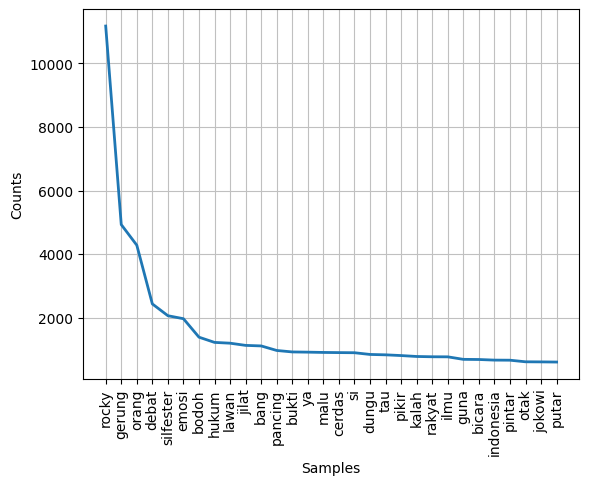

In [68]:
freq_dist.plot(30, cumulative=False)
plt.show()

## Evaluasi Word Frequency

In [69]:
df = pd.DataFrame(freq_dist.most_common(), columns=['kata', 'frekuensi'])
df.to_csv('./data/word-frequency.csv', index=False)